In [3]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline
#%matplotlib
import os
# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt
# Importamos librerías para manejo de tiempo
import time

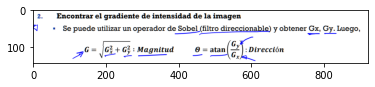

In [4]:
#Calcule los gradientes en la imagen (dirección y módulo)
s=cv.imread(r"C:\Users\54922\GITHUB\vision_computadora_I\TP_Entrega_vision_por_computadora_1\Screen.png")
plt.imshow(s)
plt.show()

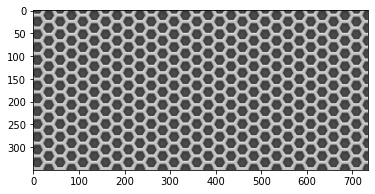

In [5]:
img_orig = cv.imread(r"C:\Users\54922\GITHUB\vision_computadora_I\Material_TPs\TP2\metalgrid.jpg")
plt.imshow(img_orig)
plt.show()

In [6]:
img_orig.shape

(350, 735, 3)

Tiempo de procesamiento 0.1485292911529541 segundos


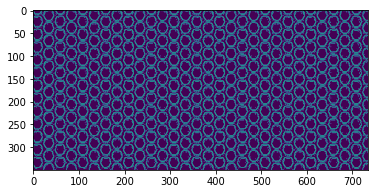

In [7]:
gray = cv.cvtColor(img_orig, cv.COLOR_BGR2GRAY)

# Aplico Canny
#=============
start = time.time()
edges = cv.Canny(gray,60,60,L2gradient=True)
elapsed = time.time()-start
print('Tiempo de procesamiento {} segundos'.format(elapsed))

plt.imshow(edges)
plt.show()


In [8]:
gray = cv.cvtColor(img_orig, cv.COLOR_BGR2GRAY)

# Suavizado Gaussiano
#====================
start = time.time()

blur = cv.GaussianBlur(gray,(5,5),0)

elapsed = time.time()-start
print('Blur {} segundos'.format(elapsed))

# Gradientes
#===========
start = time.time()

# Aplicamos Sobelx en 'float32' y luego convertimos de nuevo a 8-bit para evitar overflow
sobelx_64 = cv.Sobel(blur,cv.CV_32F,1,0,ksize=3)
absx_64 = np.absolute(sobelx_64)
sobelx_8u1 = absx_64/absx_64.max()*255
sobelx_8u = np.uint8(sobelx_8u1)

# De igual modo para Sobely
sobely_64 = cv.Sobel(blur,cv.CV_32F,0,1,ksize=3)
absy_64 = np.absolute(sobely_64)
sobely_8u1 = absy_64/absy_64.max()*255
sobely_8u = np.uint8(sobely_8u1)

# De los gradiente calculamos Magnitud y lo pasamos a 8-bit (Opcional)
mag = np.hypot(sobelx_8u, sobely_8u)
mag = mag/mag.max()*255
mag = np.uint8(mag)

# Encontramos la Dirección y la pasamos a grados
theta = np.arctan2(sobely_64, sobelx_64)
angle = np.rad2deg(theta)

elapsed = time.time()-start
print('Gradientes {} segundos'.format(elapsed))

"""ax1=plt.subplot(2,2,1),plt.imshow(sx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
ax2=plt.subplot(2,2,2),plt.imshow(sy,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
ax3=plt.subplot(2,2,3),plt.imshow(ang,cmap = 'gray')
plt.title('Angle'), plt.xticks([]), plt.yticks([])"""

"""ax3=plt.subplot(2,2,4),plt.imshow(sobel,cmap = 'gray')
plt.title('Magnitud'), plt.xticks([]), plt.yticks([])
plt.show()"""
# Hopefully see some edges
#plt.imshow(sobel,cmap = 'gray')
#plt.show()

Blur 0.31610703468322754 segundos
Gradientes 0.3698570728302002 segundos


"ax3=plt.subplot(2,2,4),plt.imshow(sobel,cmap = 'gray')\nplt.title('Magnitud'), plt.xticks([]), plt.yticks([])\nplt.show()"

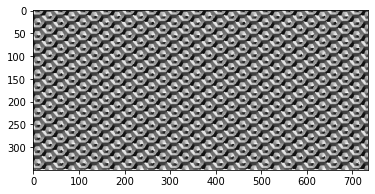

In [9]:
angle_ = angle+180
plt.imshow(angle_/angle_.max()*255,cmap = 'gray')
plt.show()

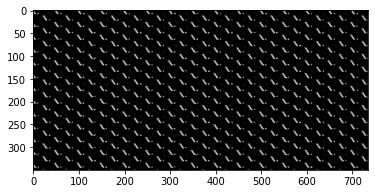

In [10]:


# Armo la máscara para ver las magnitudes para ciertos ángulos
M, N = mag.shape
out = np.zeros((M,N), dtype= np.uint8)
ang_min = 90
ang_max = 180
output = np.where(np.logical_and(angle > ang_min, angle < ang_max),mag, out)
#output = (255-output)

plt.imshow(output,cmap = 'gray')
plt.show()



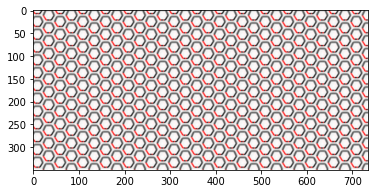

In [11]:
magrgb = cv.cvtColor((255-mag),cv.COLOR_GRAY2RGB)


magrgb[:,:,2] = magrgb[:,:,2]+output

plt.imshow(cv.cvtColor(magrgb, cv.COLOR_RGB2BGR))
plt.show()

